# Ultralytics Yolo V3 설치

In [4]:
!git clone https://github.com/ultralytics/yolov3
!cd yolov3; pip install -qr requirements.txt

In [5]:
!cat yolov3/requirements.txt

# pip install -r requirements.txt

# base ----------------------------------------
matplotlib>=3.2.2
numpy>=1.18.5
opencv-python>=4.1.2
Pillow
PyYAML>=5.3.1
scipy>=1.4.1
torch>=1.7.0
torchvision>=0.8.1
tqdm>=4.41.0

# logging -------------------------------------
tensorboard>=2.4.1
# wandb

# plotting ------------------------------------
seaborn>=0.11.0
pandas

# export --------------------------------------
# coremltools>=4.1
# onnx>=1.9.0
# scikit-learn==0.19.2  # for coreml quantization

# extras --------------------------------------
# Cython  # for pycocotools https://github.com/cocodataset/cocoapi/issues/172
pycocotools>=2.0  # COCO mAP
thop  # FLOPS computation


In [7]:
from IPython.display import Image, clear_output
import torch
clear_output()
print(f"Setup complete, Using torch {torch.__version__} 
  ({torch.cuda.get_device_properties(0).name 
    if torch.cuda.is_available() else 'CPU'})")

Setup complete, Using torch 1.9.0+cu102 (Tesla T4)


In [8]:
!nvidia-smi

Thu Aug 19 07:38:08 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
!cd yolov3/data/images; ls -lia

total 656
84 drwxr-xr-x 2 root root   4096 Aug 19 07:27 .
74 drwxr-xr-x 4 root root   4096 Aug 19 07:30 ..
85 -rw-r--r-- 1 root root 487438 Aug 19 07:27 bus.jpg
86 -rw-r--r-- 1 root root 168949 Aug 19 07:27 zidane.jpg


# 이미지 Detection
- detect.py를 python으로 직접 호출 하여 수행 
- python detect.py --source 0 #webcam
                      file.jpg #image
                      file.mp4 #video
                      path/ #directory path 밑에 있는 jpg 모두 변환
                      path/*.jpg
                      'https://youtu.be/NUslVlDfqZq' # Youtube video. CV UI가 피요.
```python
print('hi')

```


In [13]:
!cd yolov3; python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source data/images

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='data/images', update=False, view_img=False, weights=['yolov3.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/2 /content/yolov3/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.027s)
image 2/2 /content/yolov3/data/images/zidane.jpg: 384x640 2 persons, 3 ties, Done. (0.025s)
Results saved to runs/detect/exp2
Done. (0.124s)


In [15]:
# 결과가 runs/detect/exp 에 저장 됨
!ls -lia yolov3/runs/detect/exp

total 748
211 drwxr-xr-x 2 root root   4096 Aug 19 07:50 .
210 drwxr-xr-x 4 root root   4096 Aug 19 07:52 ..
217 -rw-r--r-- 1 root root 496310 Aug 19 07:50 bus.jpg
218 -rw-r--r-- 1 root root 255505 Aug 19 07:50 zidane.jpg


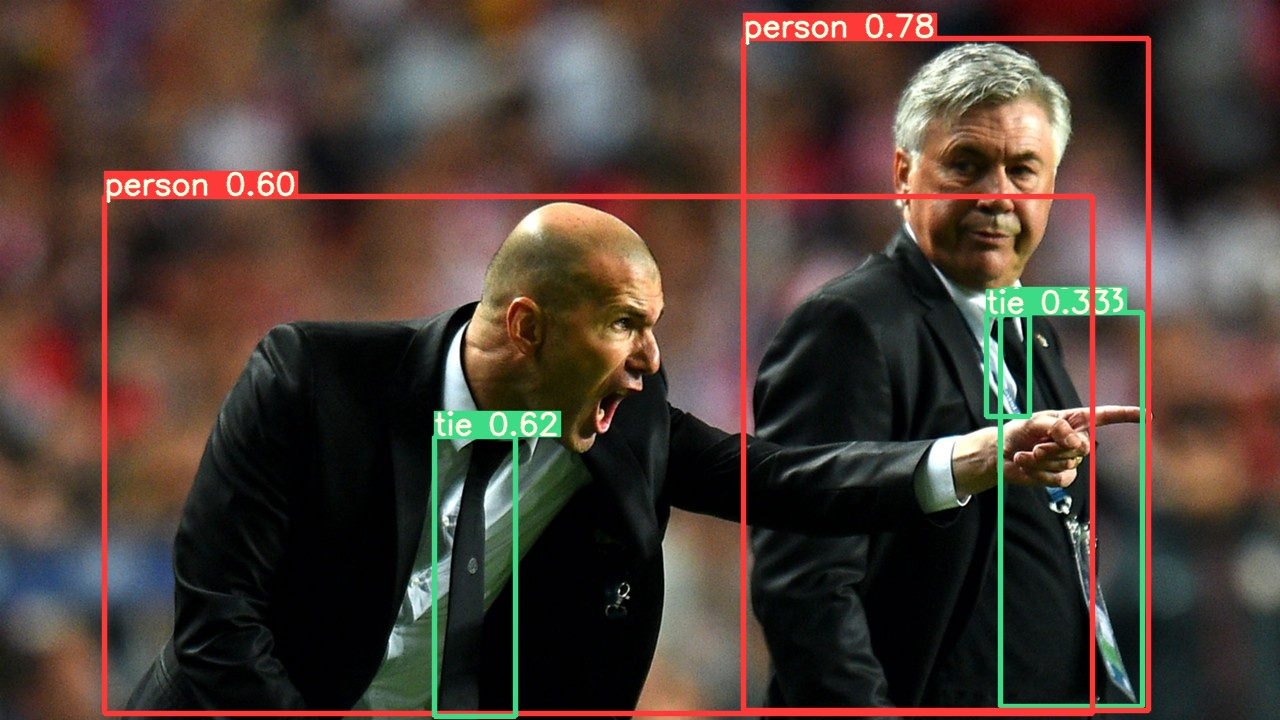

In [16]:
Image(filename='yolov3/runs/detect/exp/zidane.jpg', width=600)

In [19]:
!mkdir /content/data
!wget -O /content/data/beatles01.jpg http://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg?raw=true
!wget -O /content/data/Night_day_Chase.mp4 http://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4?raw=true

mkdir: cannot create directory ‘/content/data’: File exists
URL transformed to HTTPS due to an HSTS policy
--2021-08-19 08:05:15--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘/content/data/beatles01.jpg’

/content/data/beatl 100%[===================>] 374.14K  --.-KB/s    in 0.02s   

2021-08-19 08:05:15 (19.1 MB/s) - ‘/content/data/beatles01.jpg’ saved [383118/383118]

URL transformed to HTTPS due to an HSTS policy
--2021-08-19 08:05:15--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.1

# 다른 이미지로 Detect 수행

In [26]:
!cd yolov3; python detect.py --weights yolov3.pt --img 640 \
  --conf 0.25 --source /content/data/beatles01.jpg \
  --project /content/data --name=run_image \
  --exist-ok --line-thickness 1

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=True, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=1, max_det=1000, name='run_image', nosave=False, project='/content/data', save_conf=False, save_crop=False, save_txt=False, source='/content/data/beatles01.jpg', update=False, view_img=False, weights=['yolov3.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/1 /content/data/beatles01.jpg: 512x640 5 persons, 10 cars, 1 tie, Done. (0.028s)
Results saved to /content/data/run_image
Done. (0.056s)


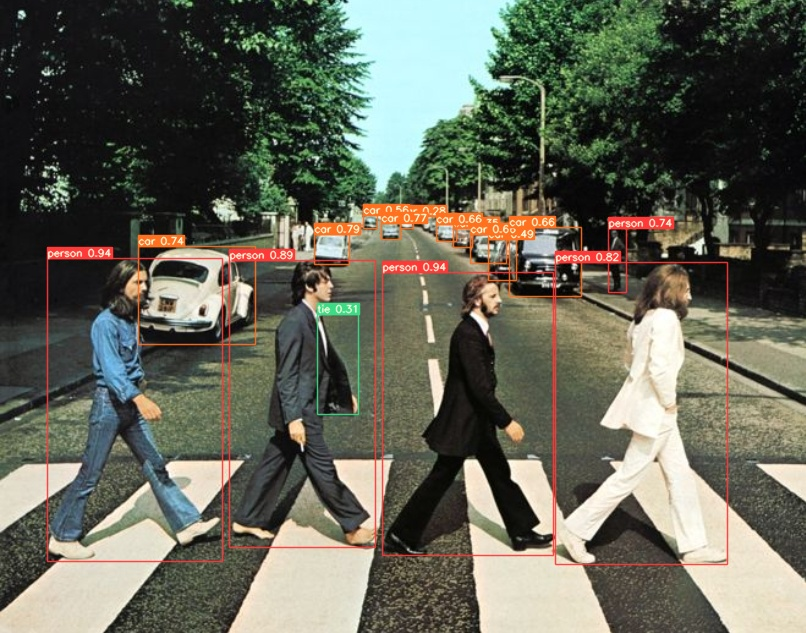

In [27]:
Image(filename='/content/data/run_image/beatles01.jpg', width=600)

# Video Detection
- detect.py의 source가 .mp4이면 자동으로 Video Detection 수행함.

In [29]:
!cd yolov3; python detect.py --weights yolov3.pt --img 640 \
  --conf 0.25 --source /content/data/Night_day_Chase.mp4 \
  --project /content/data --name=run_video \
  --exist-ok --line-thickness 1

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=True, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=1, max_det=1000, name='run_video', nosave=False, project='/content/data', save_conf=False, save_crop=False, save_txt=False, source='/content/data/Night_day_Chase.mp4', update=False, view_img=False, weights=['yolov3.pt'])
YOLOv3 🚀 v9.5.0-13-g1be3170 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
video 1/1 (1/1383) /content/data/Night_day_Chase.mp4: 288x640 1 person, 1 motorcycle, Done. (0.023s)
video 1/1 (2/1383) /content/data/Night_day_Chase.mp4: 288x640 1 person, 1 motorcycle, 1 bench, Done. (0.022s)
video 1/1 (3/1383) /content/data/Night_day_Chase.mp4: 288x640 1 person, 1 motorcycle, 1 bench, Done. (0.022s)
video 1/1 (4/1383) /content/data/Night_day_Chase.mp4: 288x640 1 person, 1 motorcycle, 1 bench, Done. (0.019s)
video 1/1 

In [ ]:
# Youtube 경우 UI문제.
!cd yolov3; python detect.py --weights yolo3.pt --img 640 \
    --conf 0.25 --source https://youtu.be/zbvx7pqw5Hg